# **Instalación de Kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files 
files.upload()

{}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Cargar los datos


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13854  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8329  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3706  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1605  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

Descargar la base de datos

In [6]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 338M/346M [00:03<00:00, 105MB/s]
100% 346M/346M [00:03<00:00, 108MB/s]


In [7]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# **Crear modelo**

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

from os import listdir
from os.path import isfile, join

import cv2
from tqdm.notebook import tqdm
from scipy import ndimage #cargando unas cuantas librerías necesarias y obtenemos el dataset.

Definir las categorías de escenas y sus etiquetas

In [9]:
path_train = "/content/seg_train/seg_train"
path_build = '/buildings/'
path_forest = '/forest/'
path_glacier = '/glacier/'
path_mountain = '/mountain/'
path_sea = '/sea/'
path_street = '/street/'
path_test = "/content/seg_test/seg_test"
#Definir las categorías de escenas y sus etiquetas correspondientes en el conjunto de datos

In [10]:
class_label = ['Building','Forest','Glacier','Mountain','Sea','Street']

In [11]:
paths = [path_build, path_forest, path_glacier, path_mountain, path_sea, path_street]
paths

['/buildings/', '/forest/', '/glacier/', '/mountain/', '/sea/', '/street/']

Creacion de variable del tipo Array

In [12]:
data = [] 
labels = [] 
IMG_SIZE = 150
augmentation = 10
for i, path in enumerate(paths): #Recorrido del arreglo Paths 
    img_urls = listdir(path_train+path) #Busqueda de un directorio de manera que entra a cierta carpeta para su recorruido etiqueta la carpeta de edificios pór ejemplo con la etiqueta building

    print(f"Importing {class_label[i]}s")
    for img_name in tqdm(img_urls):
        img = cv2.imread(path_train+path+img_name)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        #for u in np.linspace(-5,5,num= augmentation):
        #    im = ndimage.rotate(img, u)
        #    im = cv2.resize(im,(IMG_SIZE,IMG_SIZE))
        im = np.array(img)
        data.append(im)  ## esta linea empuja un dato a la casilla del array Data
        labels.append(i)
        im = np.array(cv2.flip(img,1))
        data.append(im)
        labels.append(i)
        #Hacemos un incremento de informacion al espejear las imagenes de derecha a izquierda

Importing Buildings


  0%|          | 0/2191 [00:00<?, ?it/s]

Importing Forests


  0%|          | 0/2271 [00:00<?, ?it/s]

Importing Glaciers


  0%|          | 0/2404 [00:00<?, ?it/s]

Importing Mountains


  0%|          | 0/2512 [00:00<?, ?it/s]

Importing Seas


  0%|          | 0/2274 [00:00<?, ?it/s]

Importing Streets


  0%|          | 0/2382 [00:00<?, ?it/s]

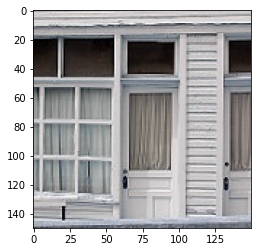

Building


In [13]:
import random

number = random.randint(0,len(data))
plt.imshow(data[number])
plt.show()
print(class_label[labels[number]])

Transformar labels en un array

In [14]:
data = np.array(data)  
data.shape

(28068, 150, 150, 3)

In [15]:
labels = np.array(labels)
labels.shape

(28068,)

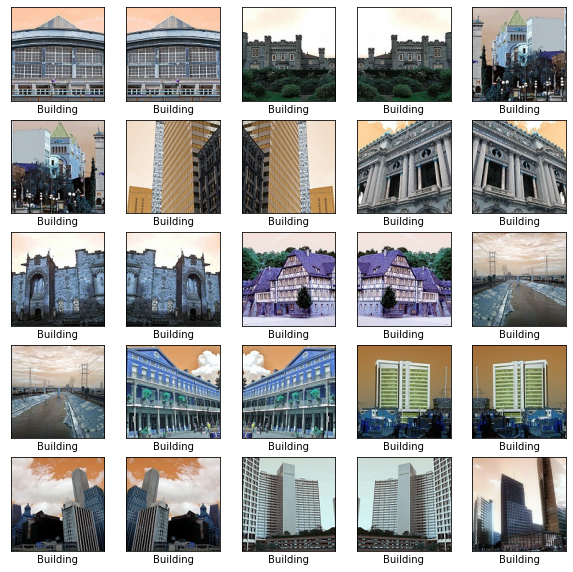

In [16]:
plt.figure(figsize=(10,10))    
for i in range(25):      
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i]) 
    plt.xlabel(class_label[labels[i]])
plt.show()

# **Modelo de la Red neuronal**

In [17]:
ini = tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=1e-2, seed=None 
)

model = Sequential()
model.add(Conv2D(32,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE,IMG_SIZE,3)
                )
         )
model.add(Conv2D(32,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(Dropout(0.3))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(MaxPool2D((2,2)))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(6, activation= 'sigmoid'))


optim = tf.keras.optimizers.Adam(
    learning_rate=5e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

model.compile(
    optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0

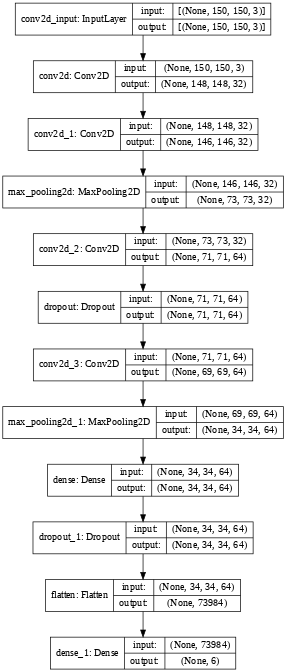

In [18]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=50)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, shuffle= True)

In [20]:
x_train.shape

(22454, 150, 150, 3)

In [21]:
x_test.shape

(5614, 150, 150, 3)

In [22]:
y_train.shape

(22454,)

In [23]:
y_test.shape

(5614,)

Entrenamiento

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True
)


epochs = 10
batch_size = 30

history = model.fit(
    x_train,y_train, batch_size=batch_size, epochs=epochs,
    callbacks=[early_stop], validation_split=0.2, shuffle=True
)

Epoch 1/10
599/599 [==============================] - 1801s 3s/step - loss: 1.1026 - accuracy: 0.5652 - val_loss: 0.8741 - val_accuracy: 0.6680
Epoch 2/10
263/599 [============>.................] - ETA: 15:54 - loss: 0.8537 - accuracy: 0.6839

# **Graficas de Epocas**

 Grafica la perdida vs Epoca

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(range(len(history.history['loss'])),history.history['loss'], label= 'Loss')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'], label= 'Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid()
plt.show()

Grafica la Precision vs Epoca

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label= 'Accuracy')
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'], label= 'Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acuracy vs Epoch')
plt.legend()
plt.grid()
plt.show()

max_ac = np.max(history.history['val_accuracy'])
print(f'Max Accuracy was: {max_ac}')


Evaluar la dataset

In [ ]:
num_samples = 10
for i in range(num_samples):
    test_num = random.randint(0,len(x_test))
    pred = model.predict(np.array([x_test[test_num]]))
    
    plt.imshow(x_test[test_num])
    plt.show()
    print(f'Predccion: {class_label[np.argmax(pred)]} \nRealidad: {class_label[y_test[test_num]]}')
    print(f'Numero de test: {test_num}')
    